<a href="https://colab.research.google.com/github/anubhawbhalotia/Machine-Learning-by-Stanford-University/blob/master/Week_1_Programming_Ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 1 Programming Ex 1**

## **Linear regression with one variable**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [1563]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [1564]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


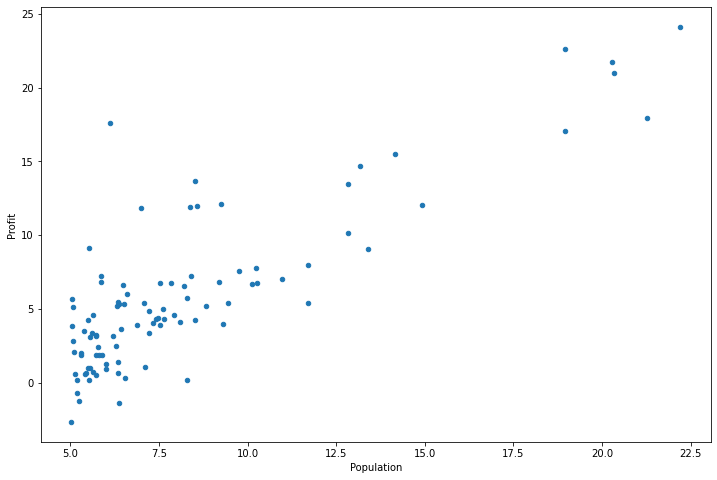

In [1565]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [0]:
def computeCost(X, y, theta):
    inner = np.power((np.dot(X, theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [1567]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [0]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [1569]:
cols

3

In [1570]:
X

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [1571]:
y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [0]:
# convert from data frames to numpy matrices
X = np.array(X.values)
y = np.array(y.values)
# initial theta values
theta = np.array([[0,0]])

In [1573]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [1574]:
computeCost(X, y, theta)

32.072733877455676

In [0]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    print(temp)
    parameters = int(theta.ravel().shape[0])
    print(parameters)
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = np.dot(X, theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, np.reshape(X[:,j], (X[:,j].size, 1)))
            temp[0,j] = theta[0,j] - ((alpha / int(X.shape[0])) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [1576]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

[[0. 0.]]
2


array([[-3.24140214,  1.1272942 ]])

In [1577]:
# final cost after iters iterations
cost[cost.size - 1]

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

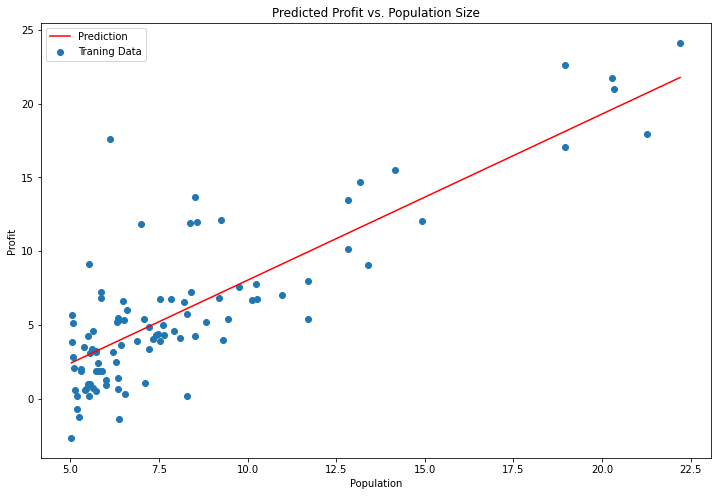

In [1578]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

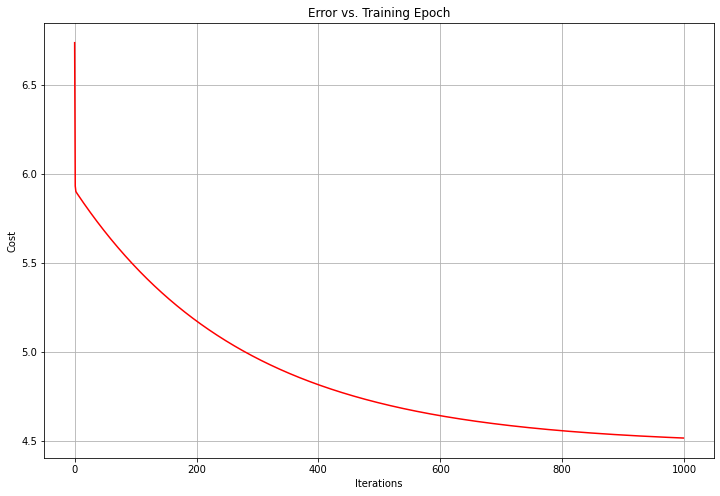

In [1579]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.grid(True)